In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)
    
    #######################
    #    your code here   #
    for i in image.flatten():
      hist[i] += 1
    #######################
    
    return hist

In [5]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  cdf = np.zeros(256,dtype=int)
  hist_chan = calc_hist(channel)
  cdf[0] = hist_chan[0]
  #######################
  #    your code here   #
  for i in range(1, len(hist_chan)):
    cdf[i] = cdf[i-1] + hist_chan[i]
  #######################
  
  return cdf

In [6]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:
    #######################
    #    your code here   #
    #######################
    # Calculate the (CDFs) of the histograms
    src_cdf = calc_cdf(src_image[:, :, channel])
    ref_cdf = calc_cdf(ref_image[:, :, channel])

    # implement with for and while loop
    # -----------------------------------------------------------------------------------------
    # Create a table to map the pixel intensities in the source image to the corresponding
    # intensities in the reference image
    src_to_ref = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        j = 0
        while ref_cdf[j] < src_cdf[i] and j < 255:
            j += 1
        src_to_ref[i] = j

    # Apply the above table to the source image to create the output image
    for i in range(output_image[:, :, channel].shape[0]):
      for j in range(output_image[:, :, channel].shape[1]):
        output_image[i, j, channel] = src_to_ref[output_image[i, j, channel]]
    # ----------------------------------------------------------------------------------------
    # implement without for and while loop
    #-----------------------------------------------------------------------------------------
    # Create the mapping table
    src_to_ref = np.searchsorted(ref_cdf, src_cdf).astype('uint8')
    # Apply the mapping table to the source image to create the output image
    #-----------------------------------------------------------------------------------------
    output_image[:, :, channel] = src_to_ref[src_image[:, :, channel]]
    
  return output_image

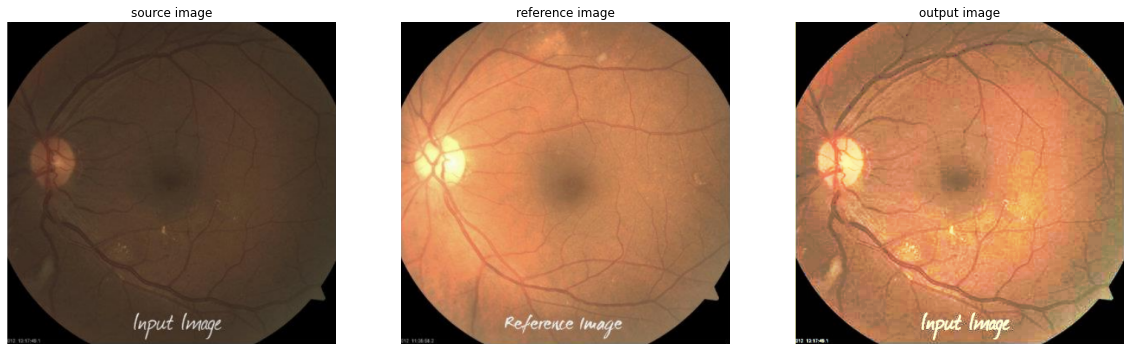

In [7]:
# Do not change this cell
# i am using colab, so i need the path of images in colab
input_path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW1/Q4_images/input.png'
ref_path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW1/Q4_images/ref.png'
src = cv2.imread(input_path)
ref = cv2.imread(ref_path)
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

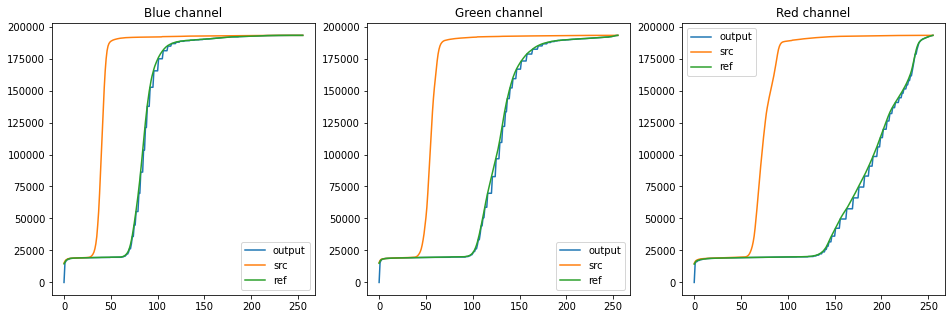

In [ ]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)